In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
target = pd.read_csv("D:\Sức khỏe\DS105-DataAnalysisAndVisualization-1\data\data [Đạt]\data_model.csv")

In [3]:
target.head()

,Country,Year,Carbon stocks in forests,Drought,Extreme temperature,Flood,Forest area,Landslide,Share of forest area,Storm,TOTAL,"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980",Wildfire
0,Armenia,2018,15.4052,0.0,0.0,0.0,328.89,0.0,11.552160,1.0,1.0,2.739,0.0
1,Armenia,2019,15.3954,0.0,0.0,0.0,328.68,0.0,11.544784,1.0,1.0,1.864,0.0
2,Armenia,2020,15.3855,0.0,0.0,0.0,328.47,0.0,11.537408,1.0,1.0,1.954,0.0
3,Armenia,2021,NaN,0.0,0.0,0.0,328.26,0.0,11.530032,0.0,0.0,2.183,0.0
4,Armenia,2022,NaN,0.0,0.0,0.0,328.05,0.0,11.522655,0.0,0.0,1.845,0.0


In [4]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Country                                                                                           205 non-null    object 
 1   Year                                                                                              205 non-null    int64  
 2   Carbon stocks in forests                                                                          123 non-null    float64
 3   Drought                                                                                           205 non-null    float64
 4   Extreme temperature                                                                               205 non-null    float64
 5   F

In [5]:
target.isnull().sum()

Country                                                                                              0
Year                                                                                                 0
Carbon stocks in forests                                                                            82
Drought                                                                                              0
Extreme temperature                                                                                  0
Flood                                                                                                0
Forest area                                                                                          0
Landslide                                                                                            0
Share of forest area                                                                                 0
Storm                                                                    

In [6]:
target.describe()

,Year,Carbon stocks in forests,Drought,Extreme temperature,Flood,Forest area,Landslide,Share of forest area,Storm,TOTAL,"Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980",Wildfire
count,205.000000,123.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2020.000000,911.680419,0.068293,0.097561,1.663415,15106.282706,0.151220,26.969594,0.946341,2.985366,1.457263,0.058537
std,1.417676,2002.356138,0.252865,0.328759,2.988356,37228.721016,0.433365,23.842396,1.963403,4.341408,0.523803,0.235330
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059000,0.000000
25%,2019.000000,15.877700,0.000000,0.000000,0.000000,380.000000,0.000000,6.469501,0.000000,0.000000,1.026000,0.000000
50%,2020.000000,172.730800,0.000000,0.000000,1.000000,3454.680000,0.000000,21.685237,0.000000,1.000000,1.426000,0.000000
75%,2021.000000,711.212600,0.000000,0.000000,2.000000,14173.890000,0.000000,46.234682,1.000000,4.000000,1.792000,0.000000
max,2022.000000,9735.807400,1.000000,2.000000,25.000000,223737.320000,2.000000,72.203206,12.000000,26.000000,2.800000,1.000000


In [7]:
target.shape

(205, 13)

In [8]:
columns_to_plot = [
    'Carbon stocks in forests', 
    'Forest area', 
    'Share of forest area', 
    'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980', 
    'TOTAL'
]

data_filtered = target[['Country', 'Year'] + columns_to_plot].dropna()

In [9]:
# Tạo biểu đồ kết hợp cho từng thuộc tính liên quan với biến mục tiêu TOTAL
attributes_related = [
    'Carbon stocks in forests', 
    'Forest area', 
    'Share of forest area', 
    'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980'
]

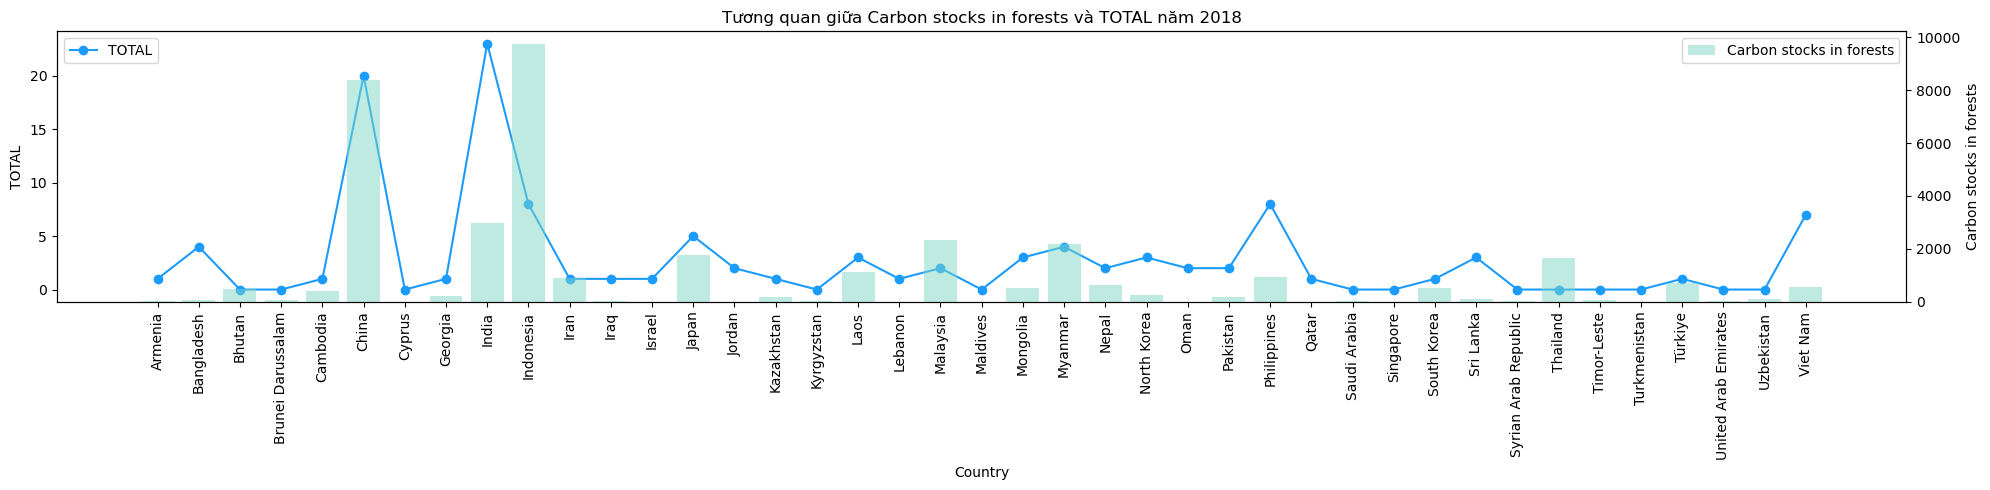

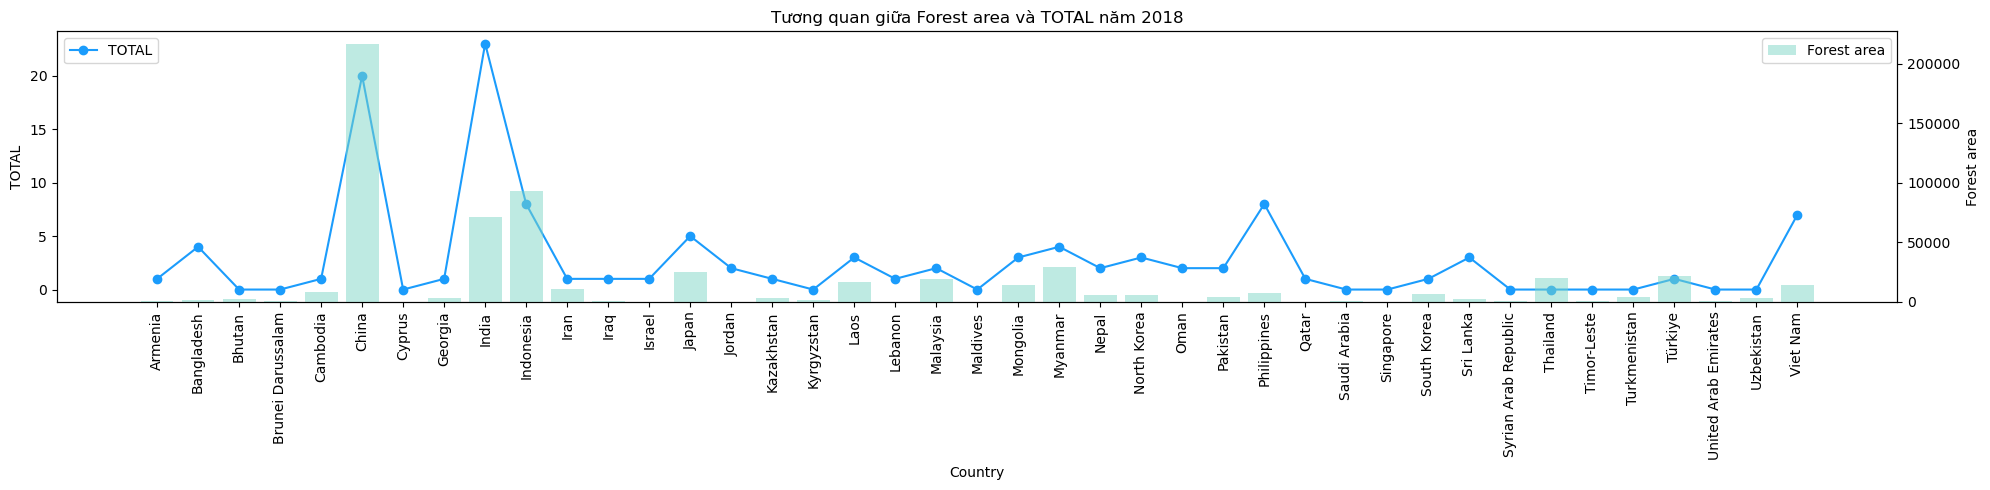

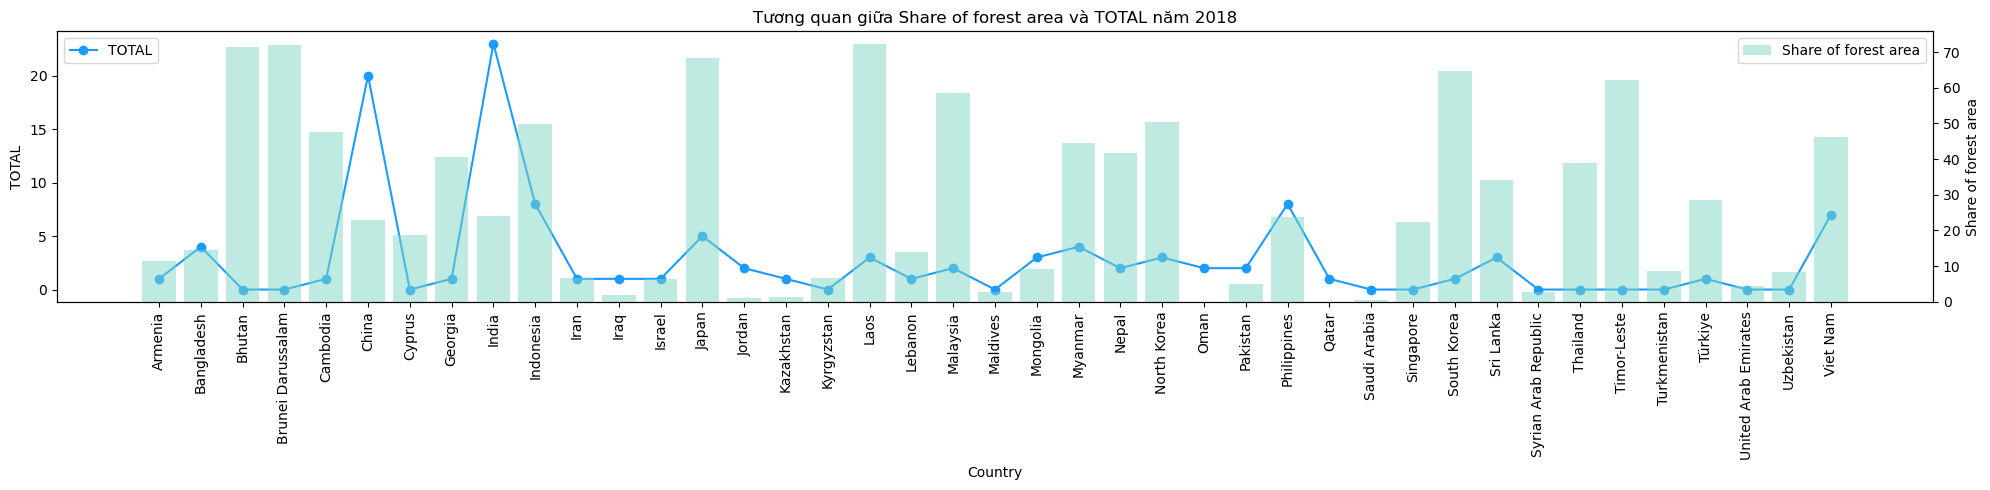

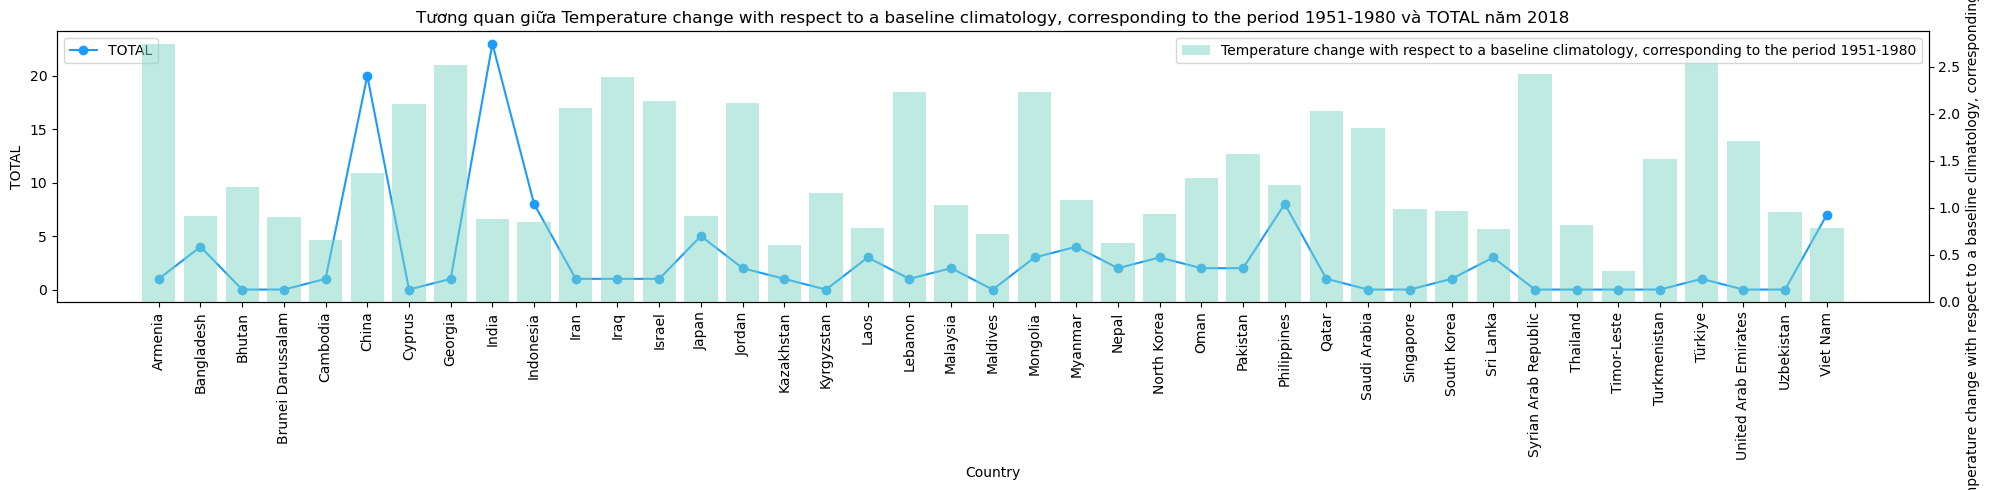

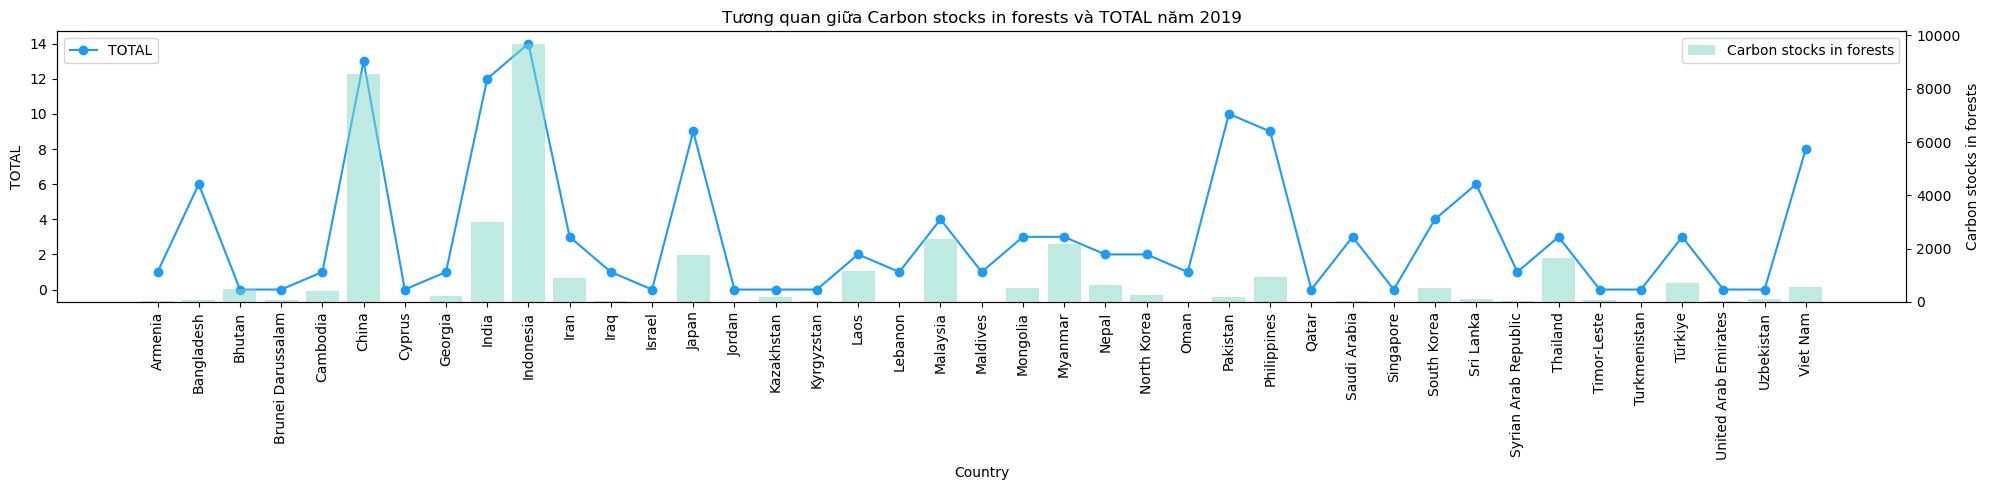

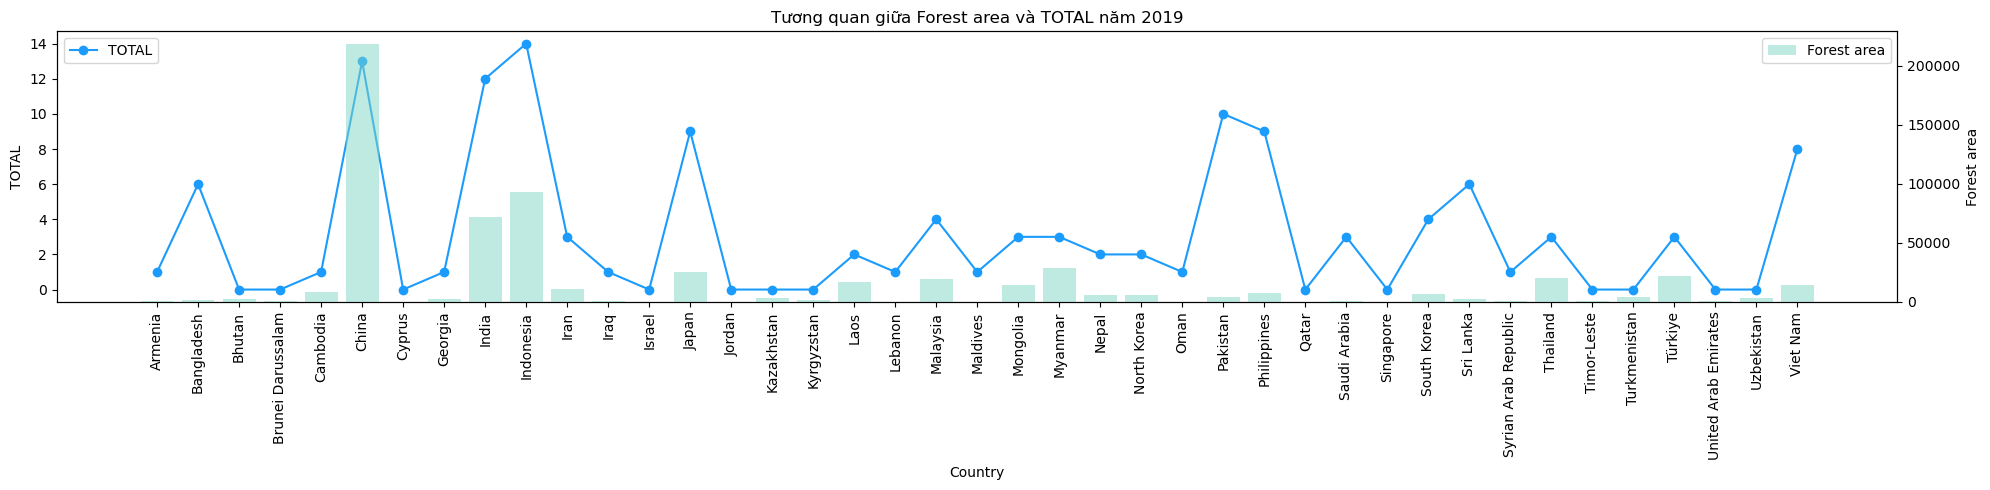

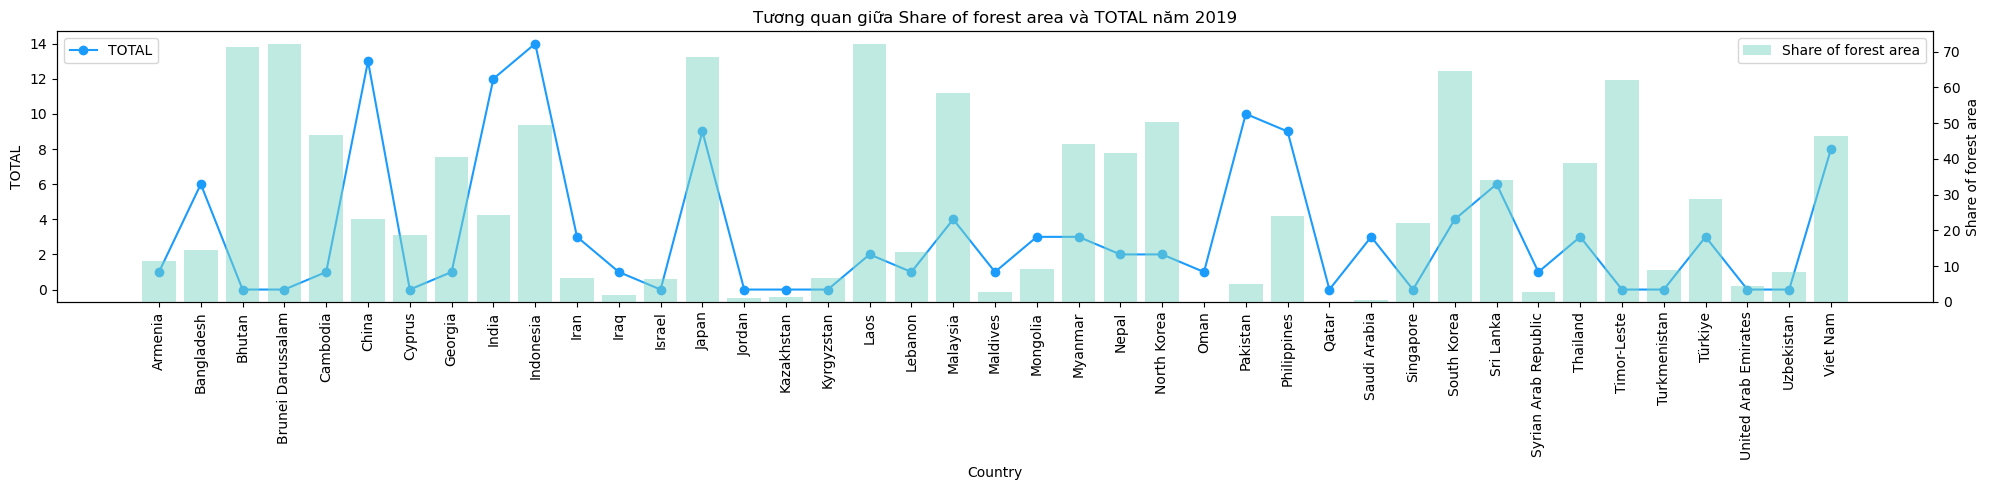

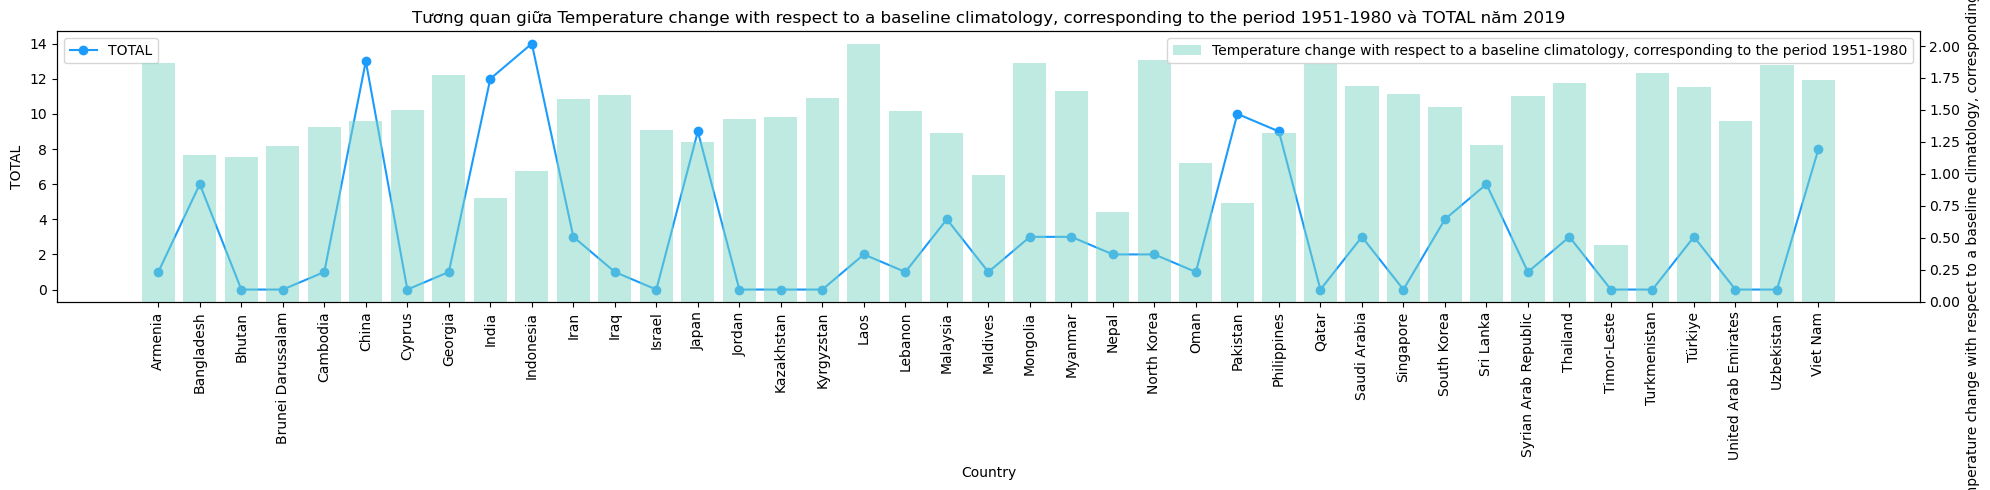

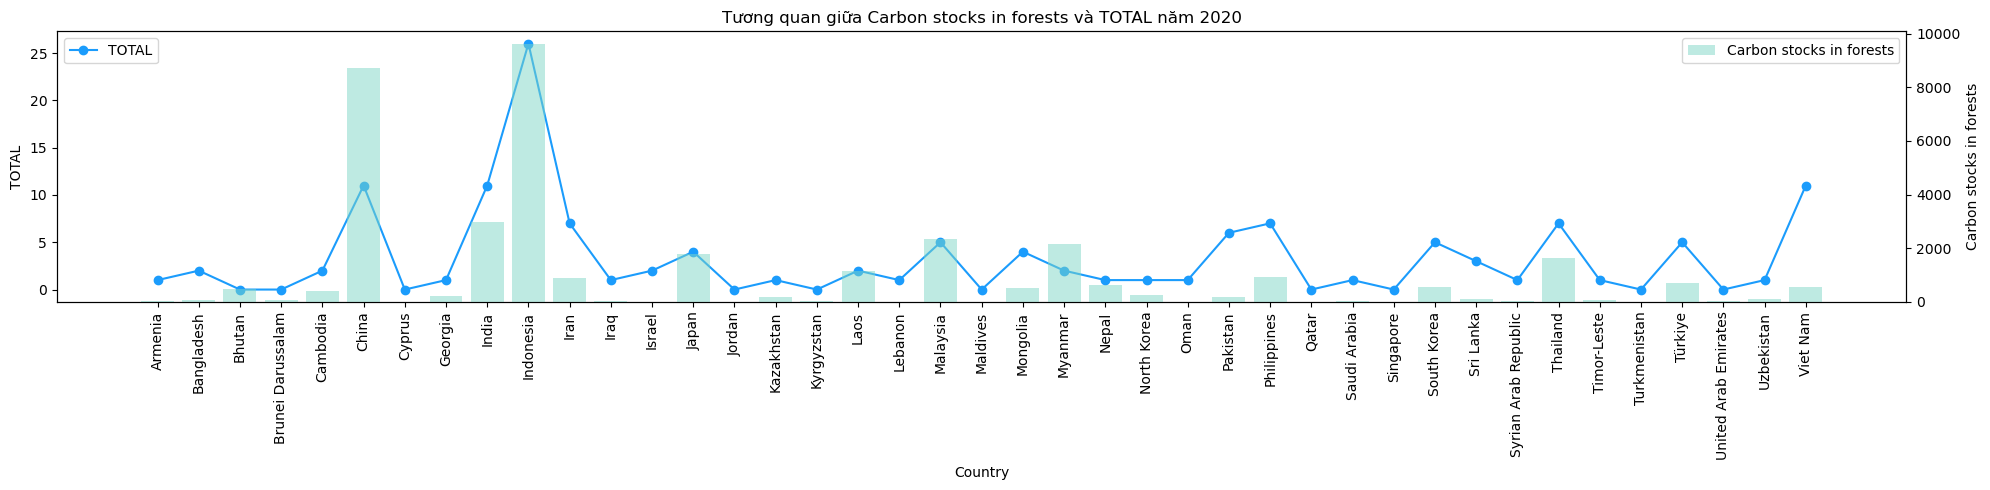

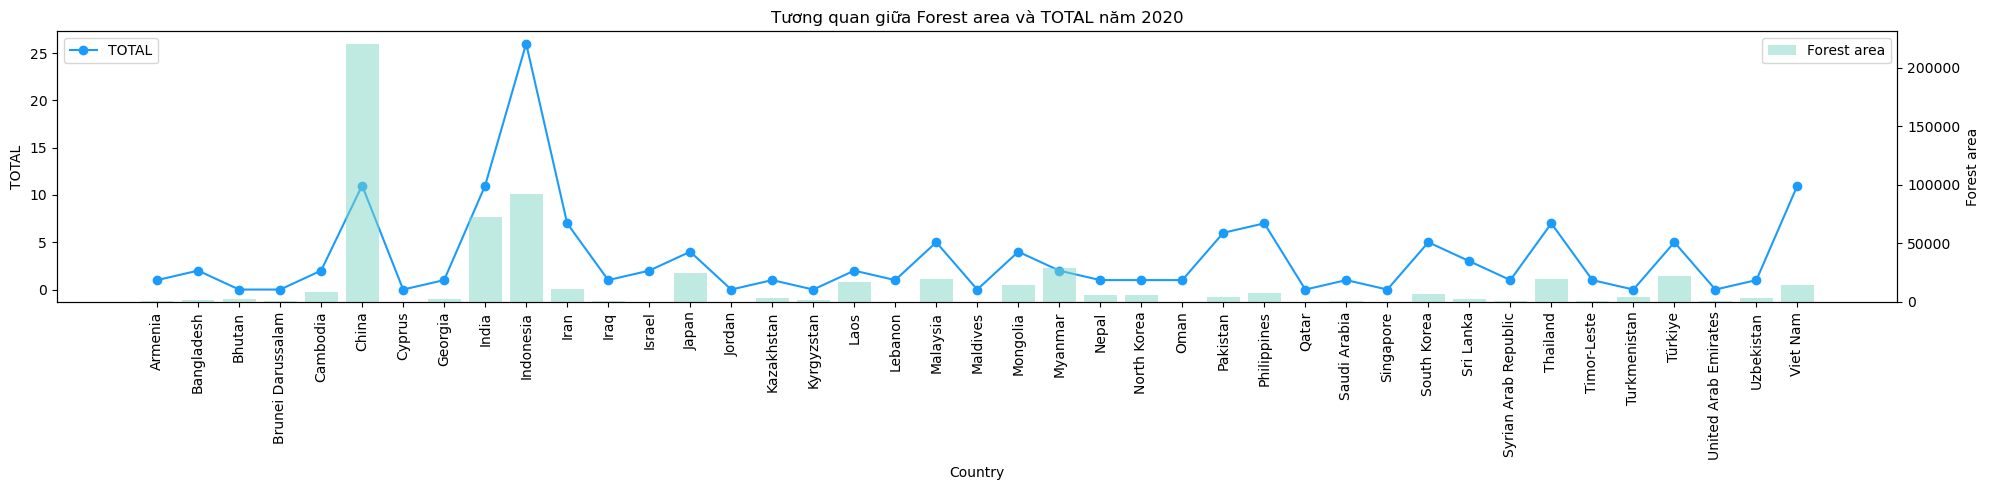

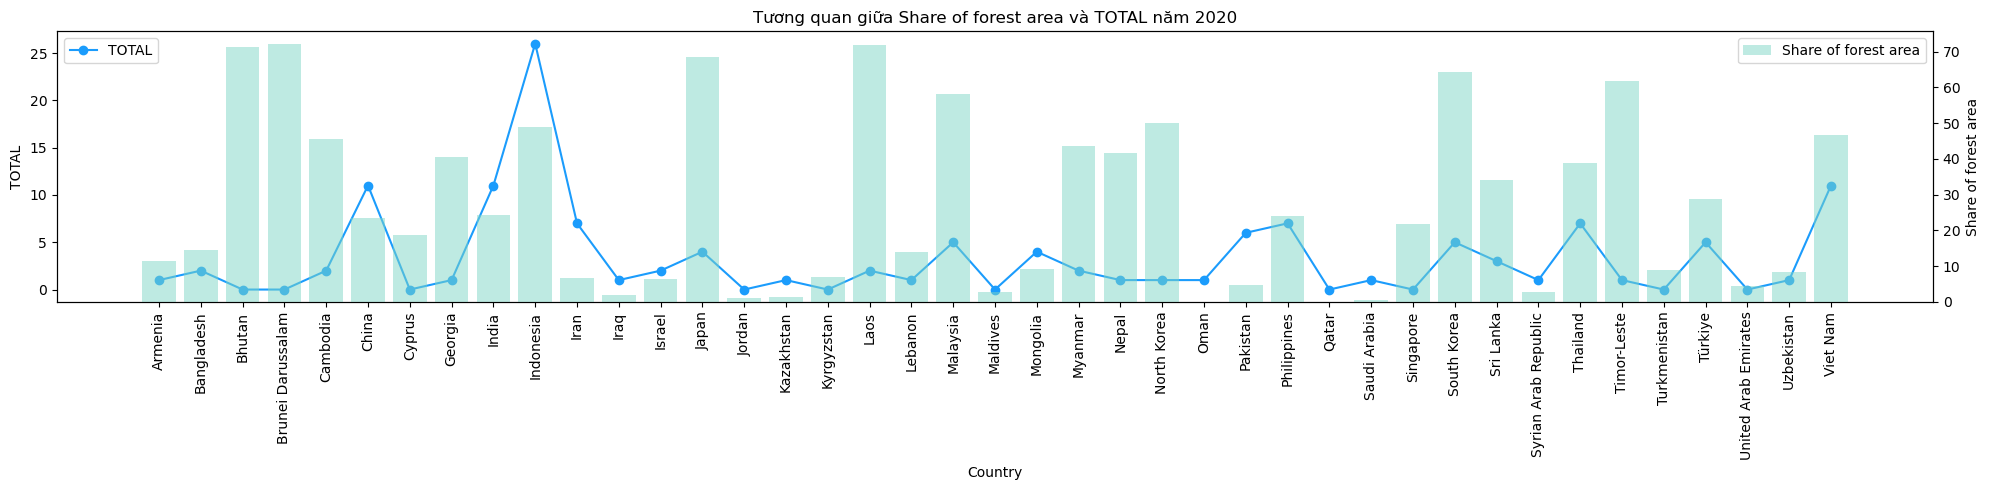

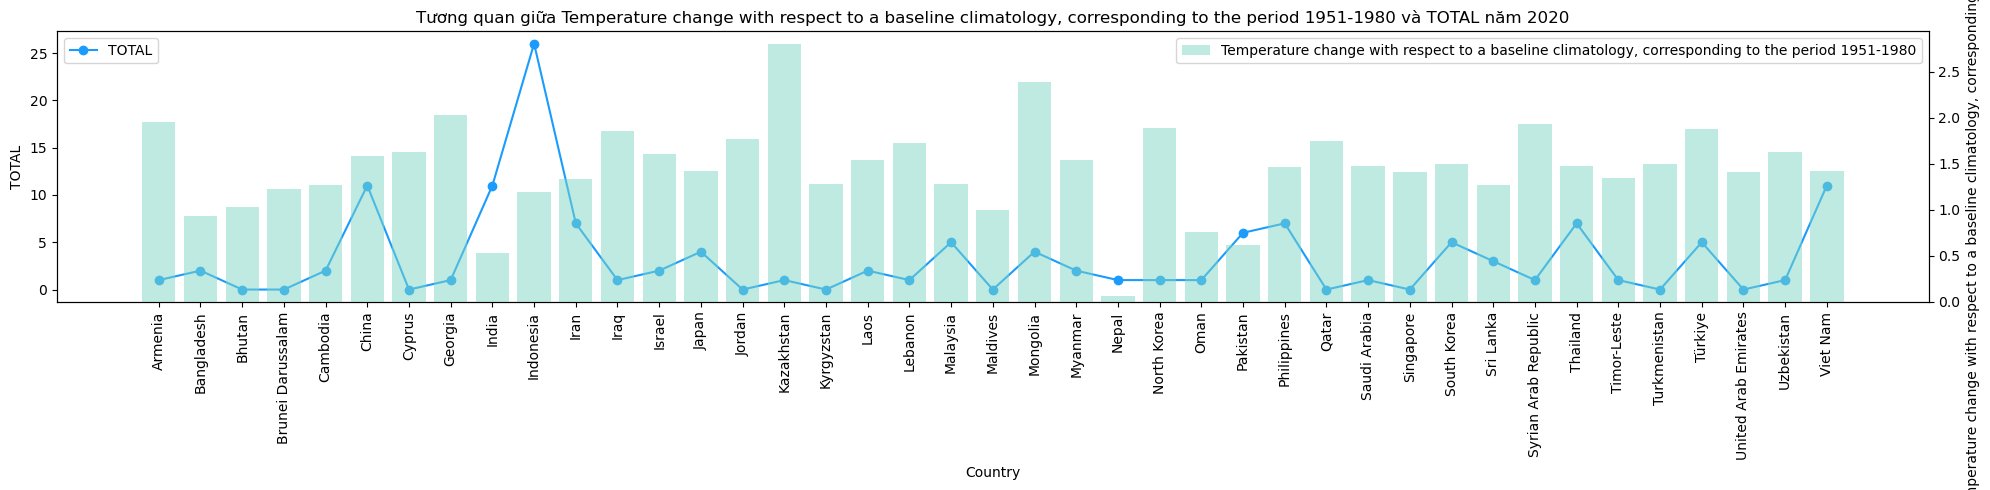

In [10]:
# Tạo palette tùy chỉnh
custom_palette = ["#7ed6c6", "#7ed6c6"]  # Màu sắc tùy chỉnh
sns.set_palette(custom_palette)

# Các thuộc tính liên quan
attributes_related = [
    'Carbon stocks in forests',
    'Forest area',
    'Share of forest area',
    'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980'
]

# Lặp qua từng năm trong bộ dữ liệu
years = data_filtered['Year'].unique()

for year in years:
    data_year = data_filtered[data_filtered['Year'] == year]
    
    # Vẽ biểu đồ riêng lẻ cho từng thuộc tính
    for attribute in attributes_related:
        fig, ax = plt.subplots(figsize=(20, 5))
        
        # Vẽ line plot cho TOTAL
        ax.plot(data_year['Country'], data_year['TOTAL'], label='TOTAL', marker='o', color='#1B9CFC')
        ax.set_ylabel('TOTAL')
        
        # Tạo axis thứ hai dùng chung trục x
        ax2 = ax.twinx()
        ax2.bar(data_year['Country'], data_year[attribute], label=attribute, alpha=0.5, color='#7ed6c6')
        ax2.set_ylabel(attribute)

        # Đặt tên trục và xoay nhãn
        ax.set_xlabel('Country')
        ax.set_xticks(range(len(data_year['Country'])))
        ax.set_xticklabels(data_year['Country'], rotation=90)

        # Đặt tiêu đề
        plt.title(f'Tương quan giữa {attribute} và TOTAL năm {year}')
        
        # Hiển thị legend
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')

        # Hiển thị biểu đồ
        plt.tight_layout()
        plt.show()



Biểu đồ tương quan cho năm 2018


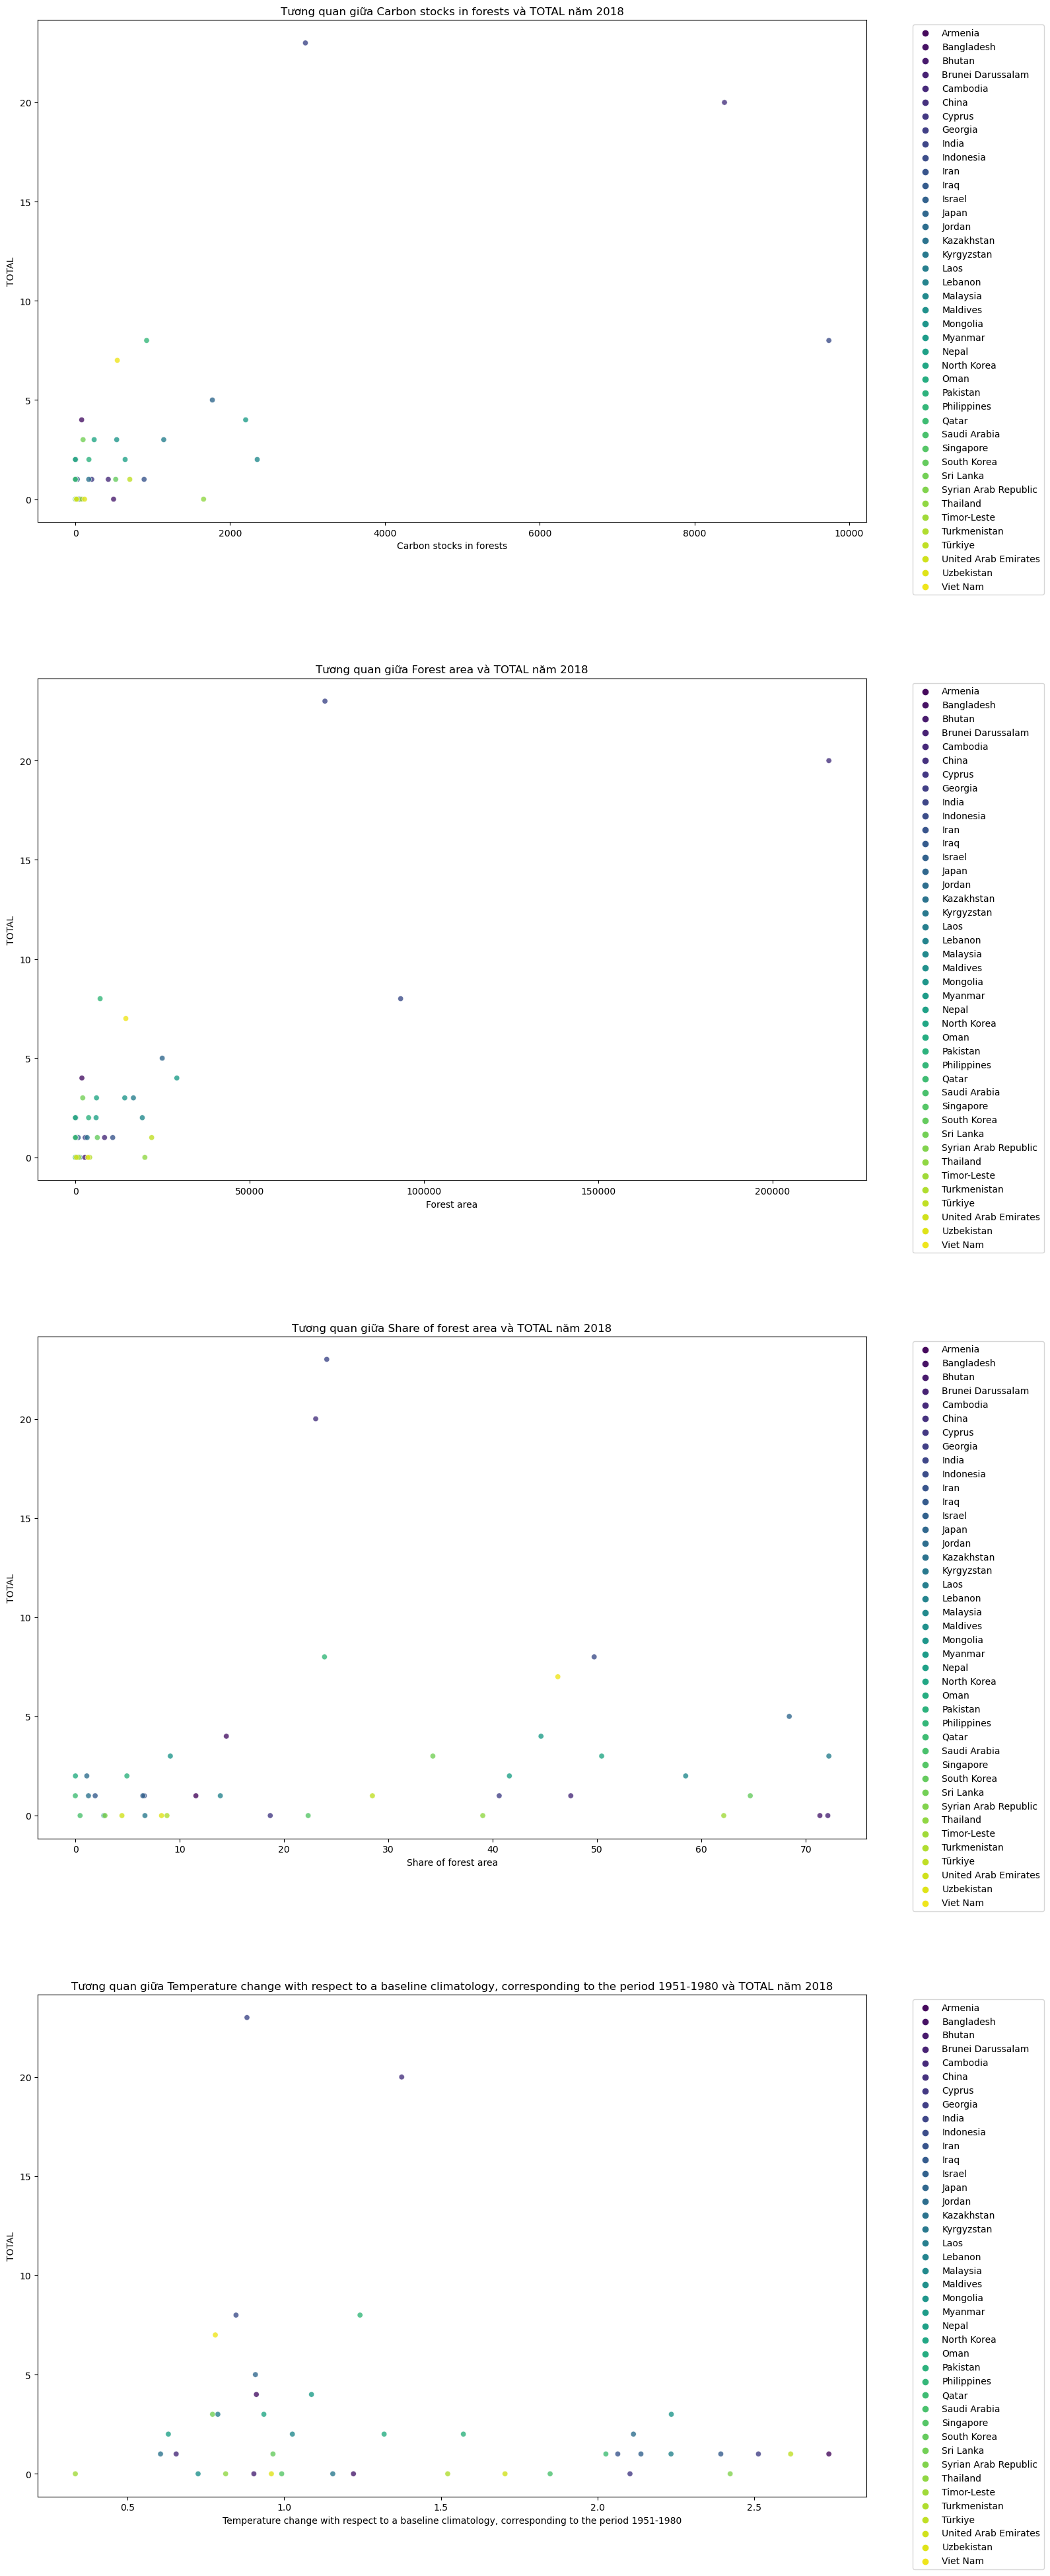


Biểu đồ tương quan cho năm 2019


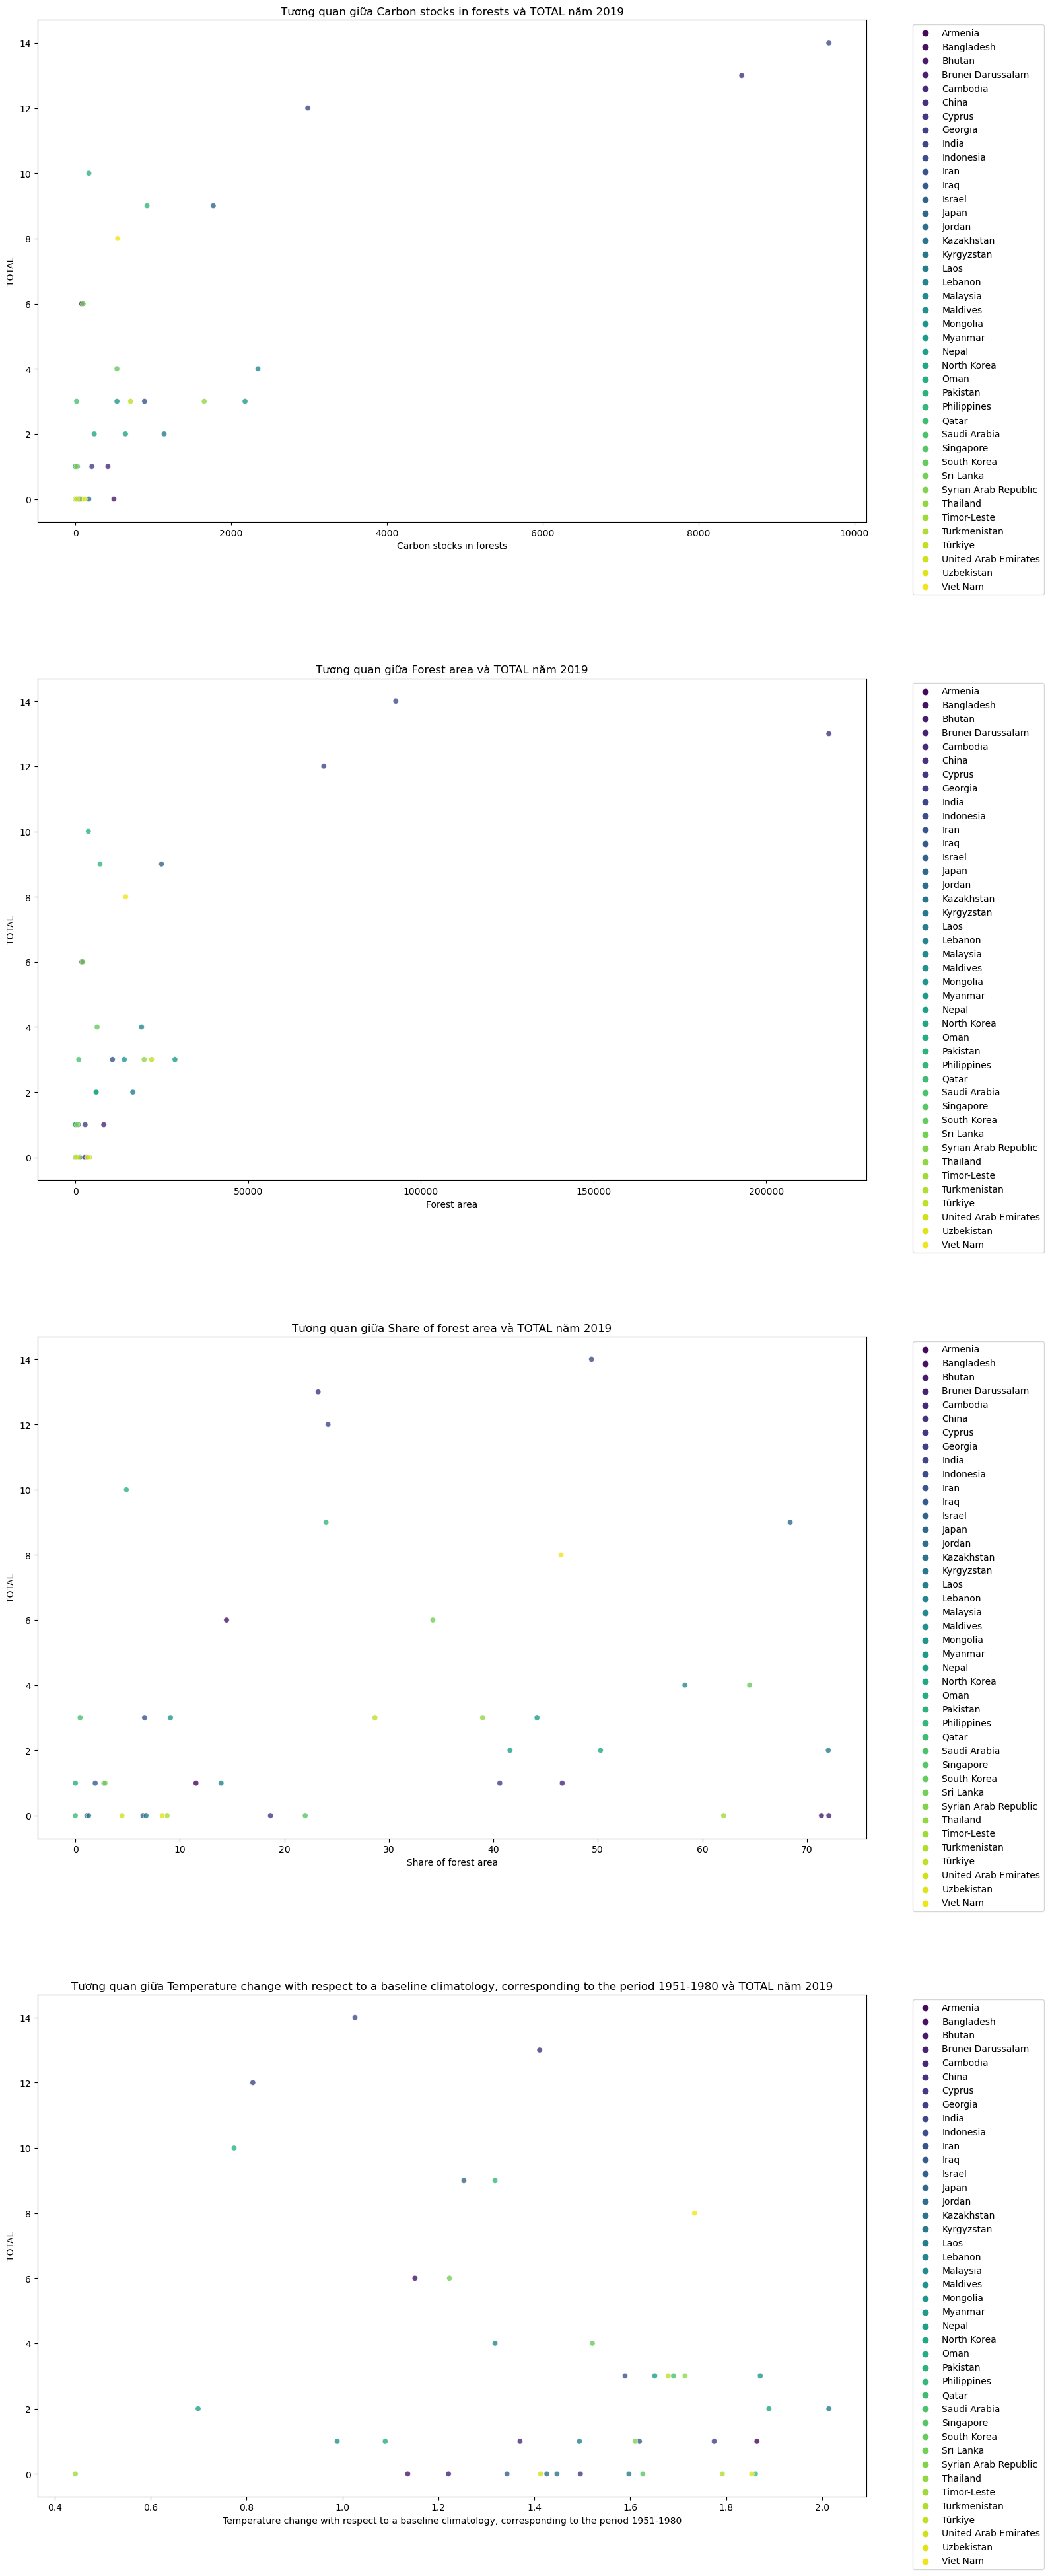


Biểu đồ tương quan cho năm 2020


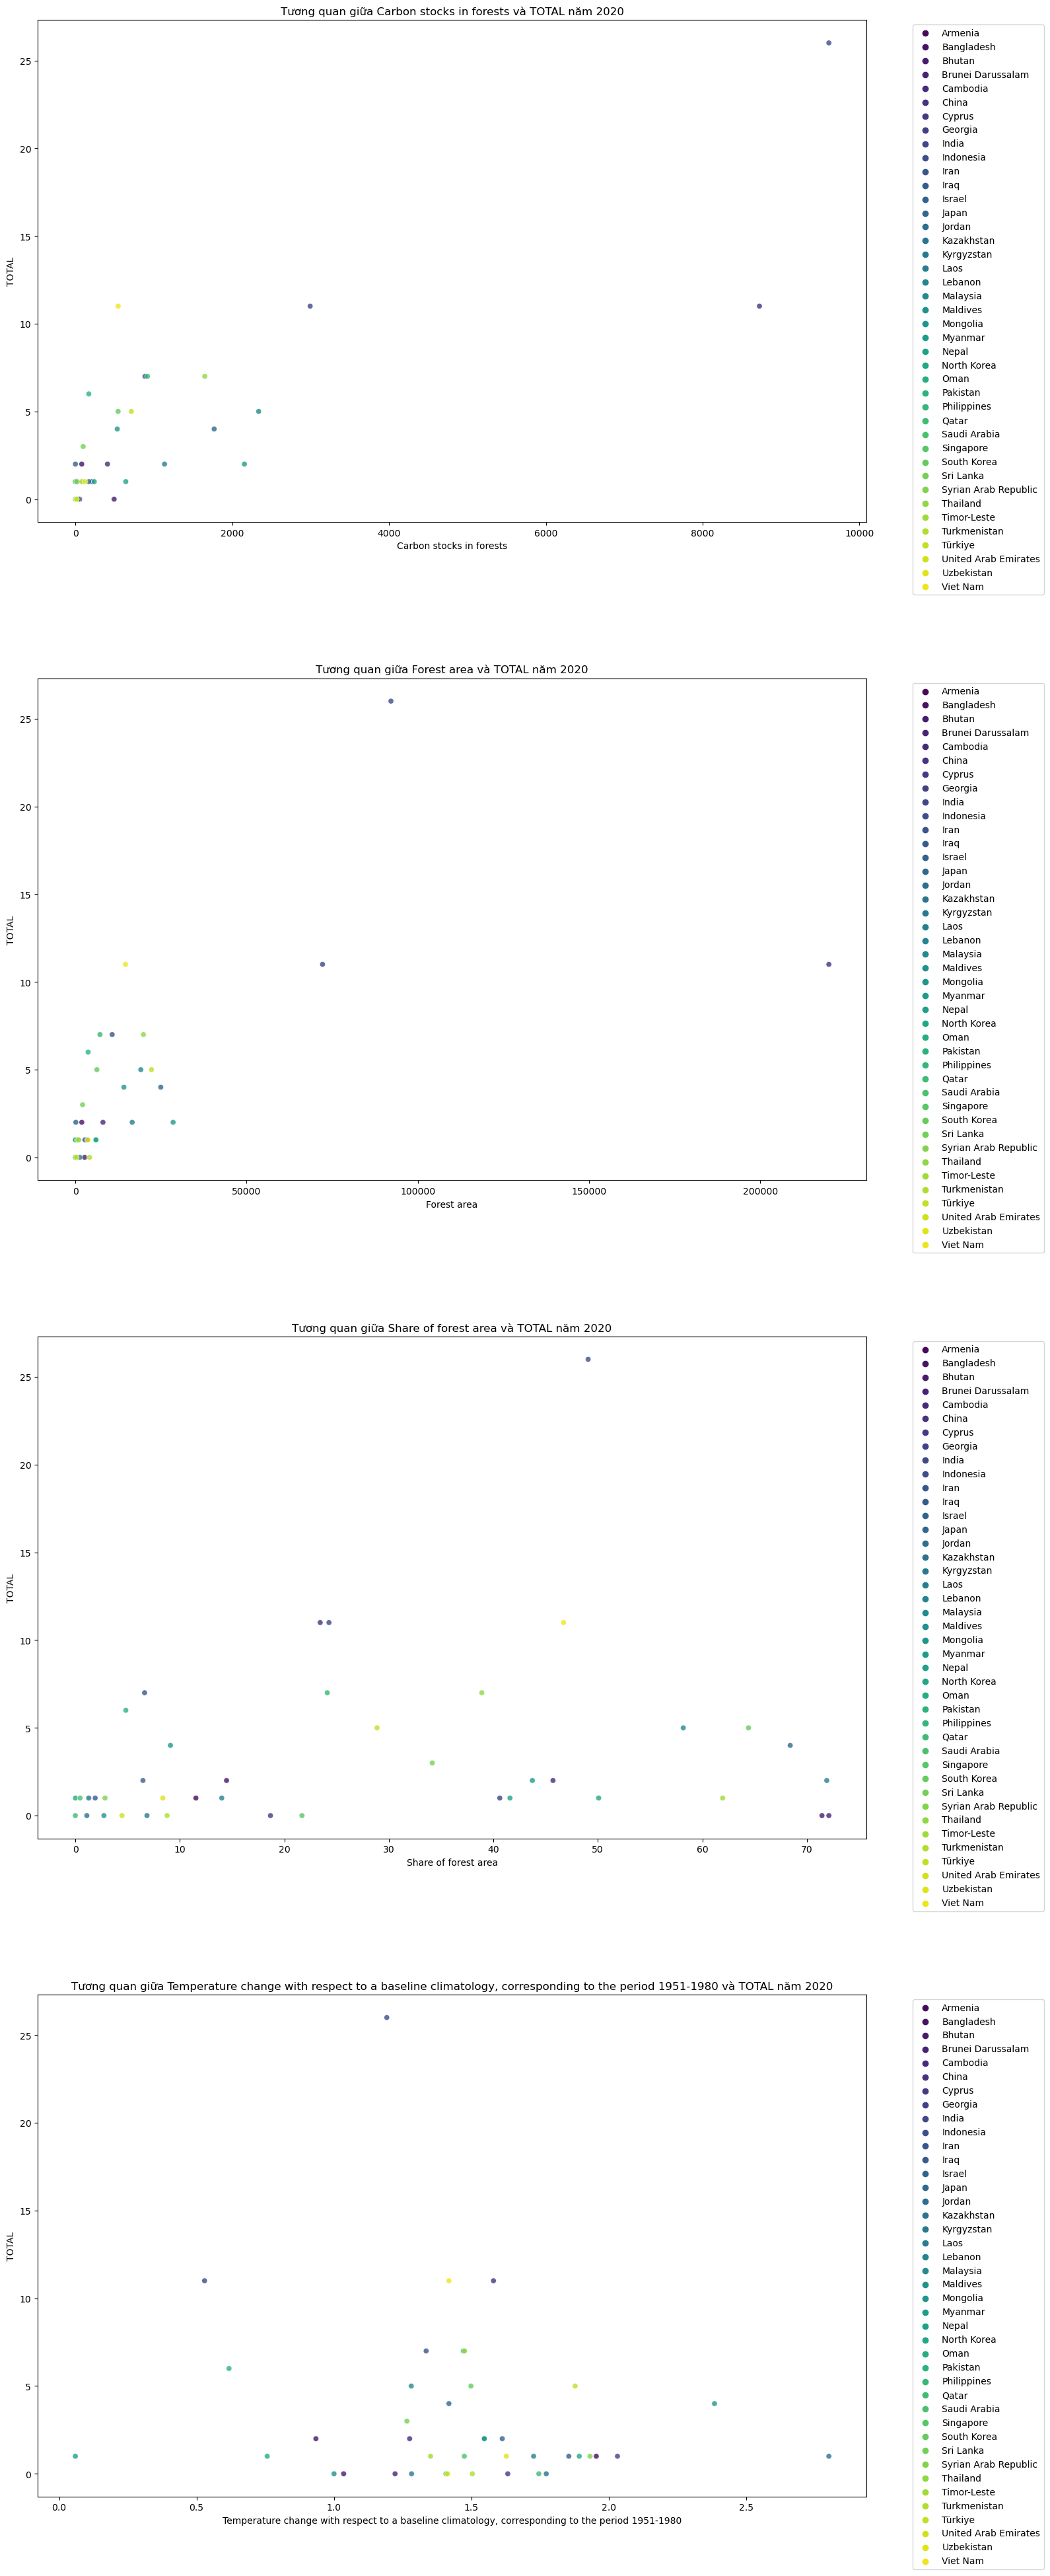

In [15]:
attributes = [
    'Carbon stocks in forests', 
    'Forest area', 
    'Share of forest area', 
    'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980'
]

# Lấy danh sách các năm duy nhất
years = data_filtered['Year'].unique()

# Lặp qua từng năm và vẽ biểu đồ
for year in years:
    data_year = data_filtered[data_filtered['Year'] == year]
    print(f"\nBiểu đồ tương quan cho năm {year}")
    
    plt.figure(figsize=(16, 10 * len(attributes)))
    
    for i, attribute in enumerate(attributes, start=1):
        plt.subplot(len(attributes), 1, i)
        sns.scatterplot(
            data=data_year, 
            x=attribute, 
            y='TOTAL', 
            hue='Country', 
            palette='viridis', 
            alpha=0.8
        )
        plt.title(f'Tương quan giữa {attribute} và TOTAL năm {year}')
        plt.xlabel(attribute)
        plt.ylabel('TOTAL')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()


C:\Users\ngmai\AppData\Local\Temp\ipykernel_26444\4051825368.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


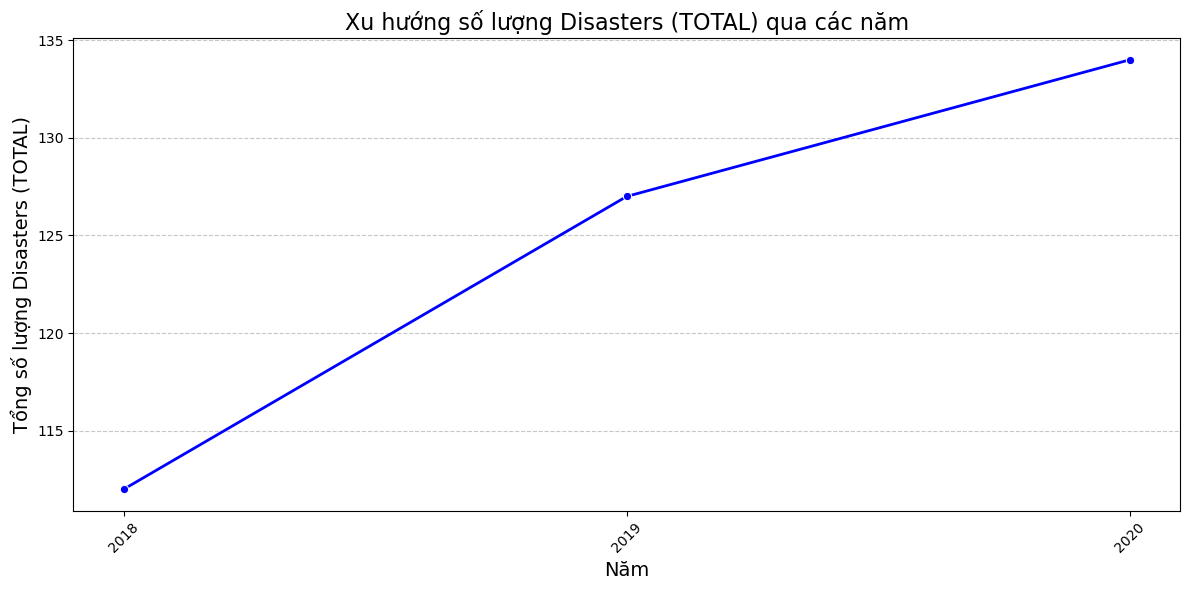

In [12]:
# Chuẩn bị dữ liệu (nếu chưa chuẩn bị)
data_by_year = data_filtered.groupby('Year')['TOTAL'].sum().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=data_by_year,
    x='Year',
    y='TOTAL',
    marker='o',
    ci=None,  # Không cần hiển thị khoảng tin cậy
    linewidth=2,
    color='b'
)
plt.title('Xu hướng số lượng Disasters (TOTAL) qua các năm', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Tổng số lượng Disasters (TOTAL)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(sorted(data_by_year['Year']), rotation=45)
plt.tight_layout()
plt.show()


In [13]:
data_by_year

,Year,TOTAL
0,2018,112.0
1,2019,127.0
2,2020,134.0
